I need

- a clean 2.5K tree
- a theoretical TRD plot
- a histogram with # crosses with >0.6, 0.7, 0.8 TRD loci
- three TRD plots, one with SV association, one with LP association, and one with Pi or DXY or FST association
- an SV plot of a locus with TRD association, for example an inversion, dotplot?
- an LP visualization, for example an MDS with the two (?) strains globally and locally?
- a plot of pi that shows a decrease?

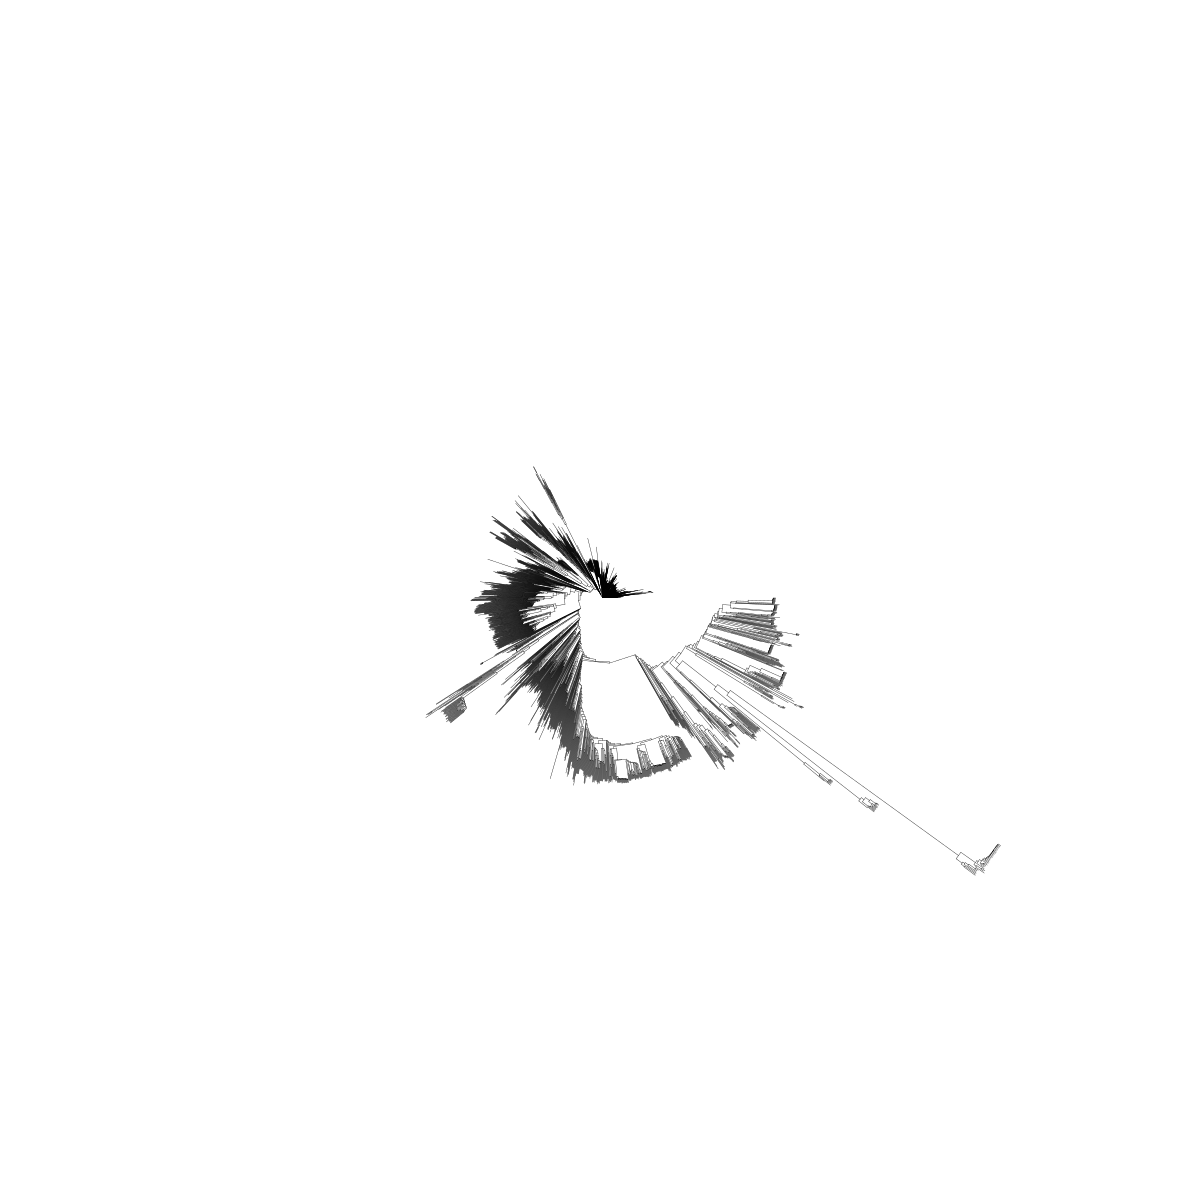

In [92]:
my.vcf <- "/home/jnrunge/data/trd/full2489Matrix.vcf.gz"
setwd(dirname(my.vcf))

tr=ape::read.tree("diss_global.newick")

# quick and dirty overview plot used in presentations

#all_strains_used<-unique(c(crosses_xlsx$`Short name 1`,crosses_xlsx$`Short name 2`))

#sum(tr$tip.label %in% all_strains_used)==length(all_strains_used)

#used_strains_in_tree<-c(tr$tip.label %in% all_strains_used,rep(NA,4976-2489))

library(ggtree)
options(repr.plot.width=10, repr.plot.height=10)
ggtree::ggtree(tr, layout="circular", size=0.1)
#geom_tippoint(aes(color=used_strains_in_tree,
#                 size=used_strains_in_tree), alpha=.75)+
#scale_color_manual(values=c("TRUE"="red"))+
#scale_size_manual(values=c("TRUE"=3,"FALSE"=0,"NA"=0))+labs(size=NULL,color=NULL)
ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/phylo.svg", width=3, height=3)

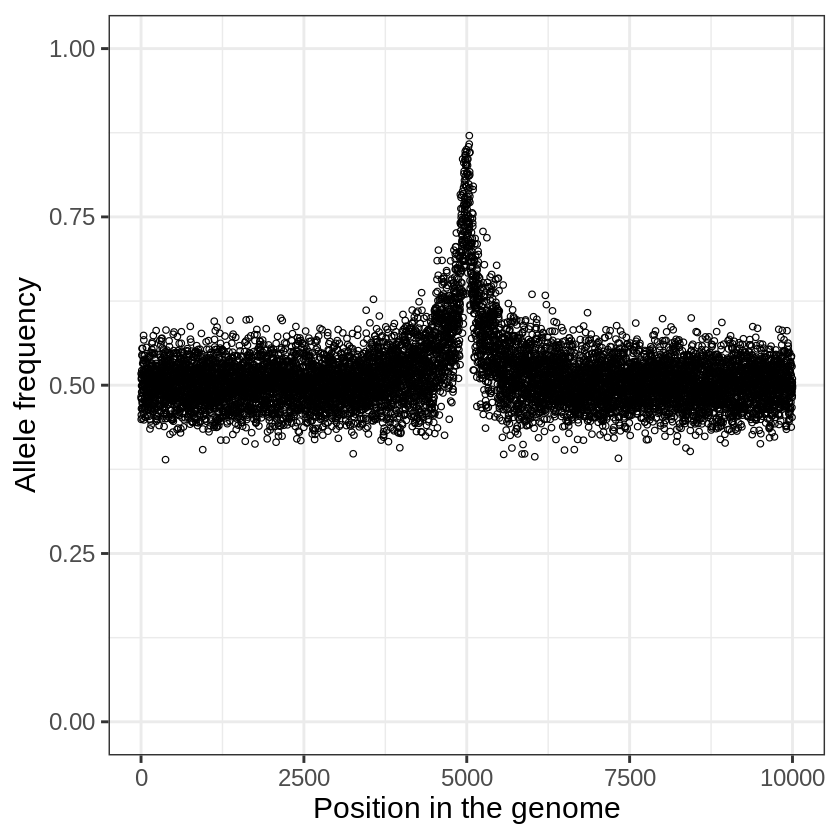

In [1]:
library(ggplot2)
# theoretical TRD
x<-1:10000

y<-rep(0.5,10000)

for(i in 1:length(y)){
    y[i]<-rnorm(1,0.5,0.03)
    
    if(i > 3500 & i <6500){
        y[i]<-y[i]+rnorm(1,0.01,0.02)
    }
    
    if(i > 4000 & i <6000){
        y[i]<-y[i]+rnorm(1,0.01,0.02)
    }
    
    if(i > 4500 & i <5500){
        y[i]<-y[i]+rnorm(1,0.05,0.02)
    }
    
    if(i > 4800 & i <5200){
        y[i]<-y[i]+rnorm(1,0.05,0.02)
    }
    
    if(i > 4900 & i <5100){
        y[i]<-y[i]+rnorm(1,0.075,0.02)
    }
    if(i > 4950 & i <5050){
        y[i]<-y[i]+rnorm(1,0.075,0.02)
    }
}

ggplot(mapping=aes(x,y))+
geom_point(shape=1)+scale_y_continuous(limits=c(0,1))+
theme_bw(18)+xlab("Position in the genome")+ylab("Allele frequency")

In [2]:
library(tidytable)


Attaching package: 'tidytable'


The following objects are masked from 'package:stats':

    dt, filter, lag


The following object is masked from 'package:base':

    %in%




In [3]:
library(ggrastr)

In [ ]:
stop("this is in the Ferrara folder on my MacBook to avoid these stupid problems")

In [10]:
ggplot(fread(paste0("~/data/TRD/results/shiny/", "YJNRC18", "-AF.csv.gz")), aes(global_pos, AD_A1 / sumCount)) +
  rasterise(geom_point(alpha = 0.1, color = "grey"), dpi=300) +
  geom_line(mapping = aes(global_pos, smoothed, color = abs(0.5 - smoothed)), inherit.aes = FALSE, linewidth = 2) +
  scale_color_viridis_c(option = "A", limits = c(0, 0.5)) +
  ylim(c(0, 1)) +
  geom_hline(yintercept = 0.5) +
  geom_vline(xintercept = chrs$global_pos) +
  #geom_vline(xintercept=c(pull(TRD_regions,global_start),pull(TRD_regions,global_end)), color="red", linetype=2, alpha=0.5)+
  theme_bw(24) +
  ylab("Allele Frequency") +
  xlab("Genomic position") +
  theme(legend.position = "none") +
  # geom_hline(yintercept = c(0.4,0.6))+
  labs(alpha = "Coverage") +
  scale_x_continuous(labels = comma, breaks=c(0,5000000,10000000))
ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/exampleTRD.svg", width=10.8, height=(13.68/3))

ERROR while rich displaying an object: Error: .onLoad failed in loadNamespace() for 'Cairo', details:
  call: dyn.load(file, DLLpath = DLLpath, ...)
  error: unable to load shared object '/home/jnrunge/anaconda3/envs/JupyteR4/lib/R/library/Cairo/libs/Cairo.so':
  libicuuc.so.70: cannot open shared object file: No such file or directory

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .   

ERROR: Error: .onLoad failed in loadNamespace() for 'Cairo', details:
  call: dyn.load(file, DLLpath = DLLpath, ...)
  error: unable to load shared object '/home/jnrunge/anaconda3/envs/JupyteR4/lib/R/library/Cairo/libs/Cairo.so':
  libicuuc.so.70: cannot open shared object file: No such file or directory


In [7]:
# Three TRD plots in one, order ChrisC8, YJNRC3, YJNRC5

# load the AF into one df, with a factor for wrapping

getAF<-function(cross){
    AF<-fread(paste0("~/data/TRD/results/shiny/", cross, "-AF.csv.gz"))
    AF<-mutate(AF, Cross=cross)
    return(AF)
}

AF<-bind_rows(getAF("ChrisC8"),getAF("YJNRC3"))
AF<-bind_rows(AF,getAF("YJNRC5"))

In [8]:
library(naturalsort)
chrs <- summarise(group_by(AF, chr), maxpos = max(pos))
chrs <- chrs[naturalorder(chrs$chr), ]
chrs$global_pos <- cumsum(chrs$maxpos)

In [9]:
library(scales)

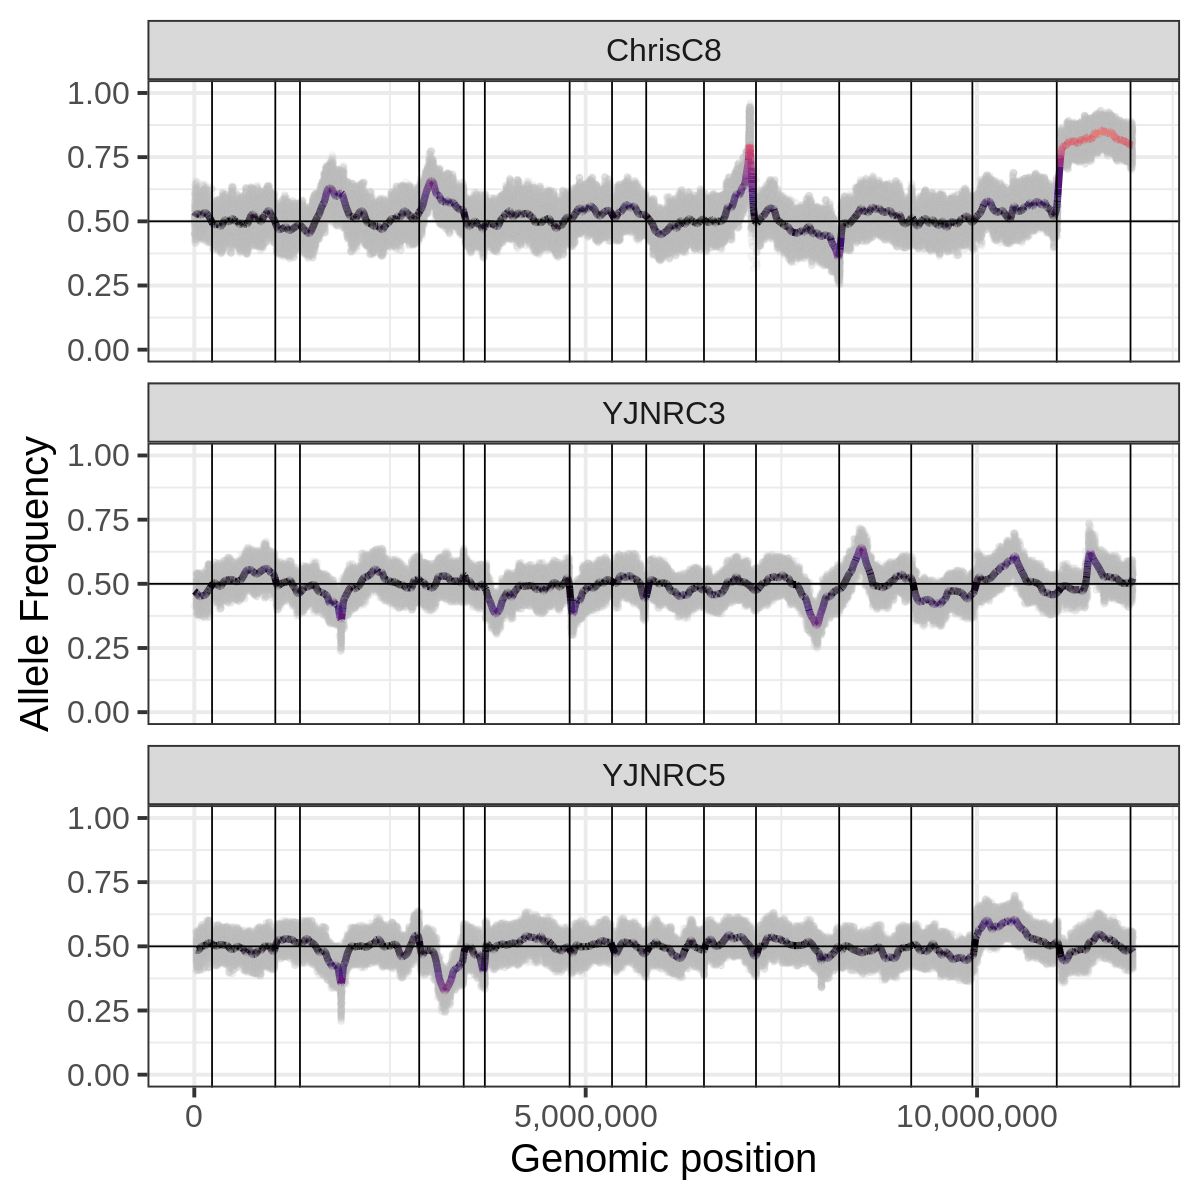

In [76]:
ggplot(AF, aes(global_pos, AD_A1 / sumCount)) +
  geom_point(alpha = 0.1, color = "grey") +
  geom_line(mapping = aes(global_pos, smoothed, color = abs(0.5 - smoothed)), inherit.aes = FALSE, linewidth = 2) +
  scale_color_viridis_c(option = "A", limits = c(0, 0.5)) +
  ylim(c(0, 1)) +
  geom_hline(yintercept = 0.5) +
  geom_vline(xintercept = chrs$global_pos) +
  #geom_vline(xintercept=c(pull(TRD_regions,global_start),pull(TRD_regions,global_end)), color="red", linetype=2, alpha=0.5)+
  theme_bw(24) +
  ylab("Allele Frequency") +
  xlab("Genomic position") +
  theme(legend.position = "none") +
  # geom_hline(yintercept = c(0.4,0.6))+
  labs(alpha = "Coverage") +
  scale_x_continuous(labels = comma, breaks=c(0,5000000,10000000))+
  facet_wrap(~Cross, ncol = 1)

ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/3TRD.svg", width=10.8, height=13.68)

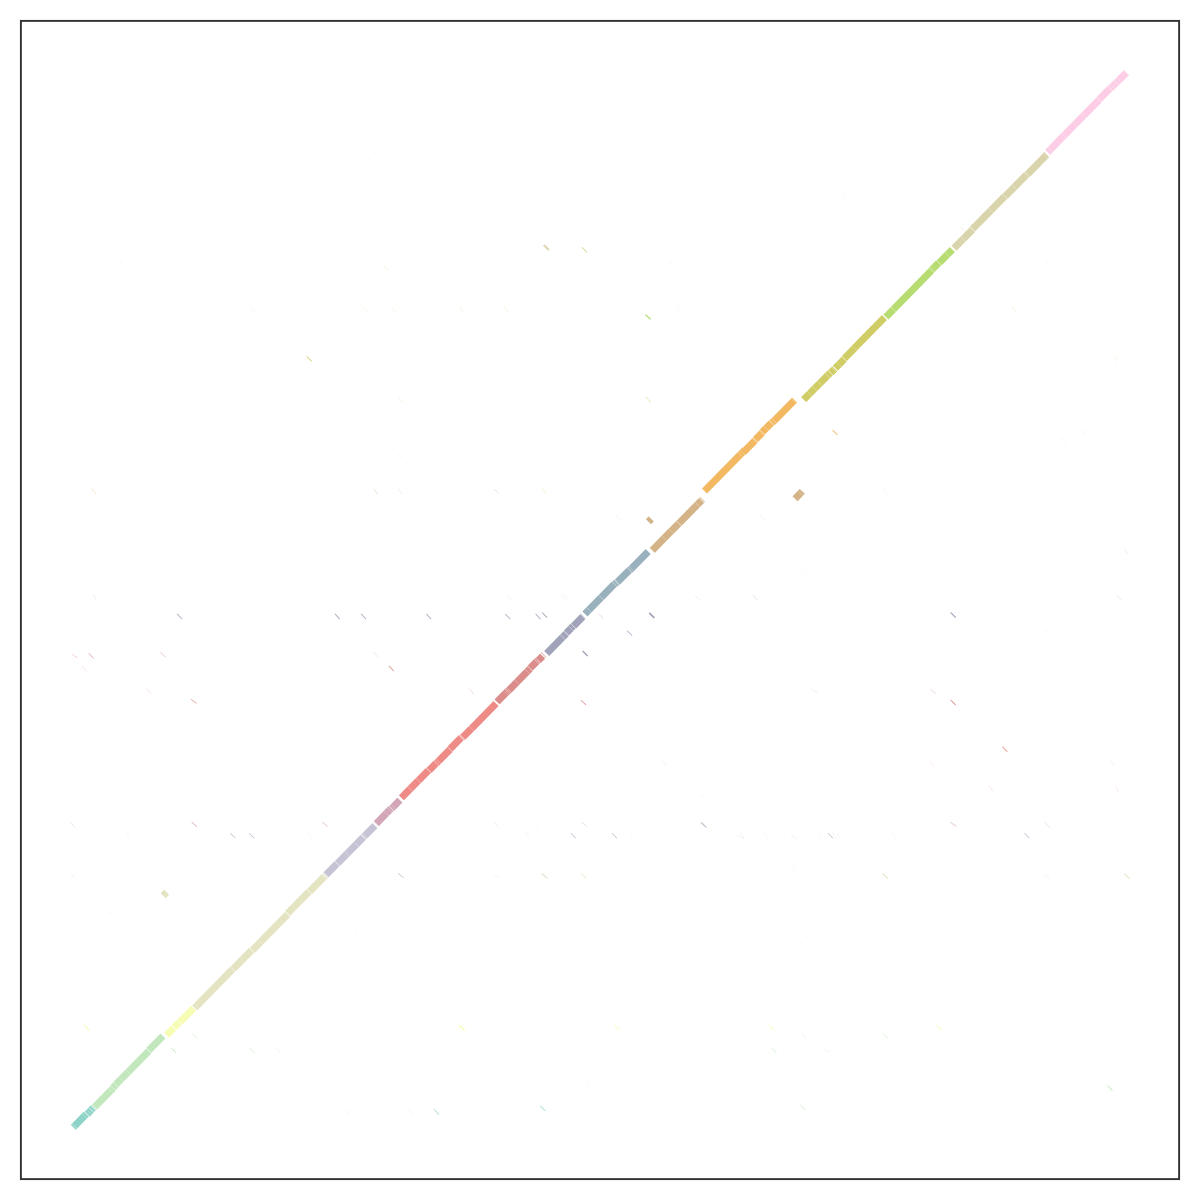

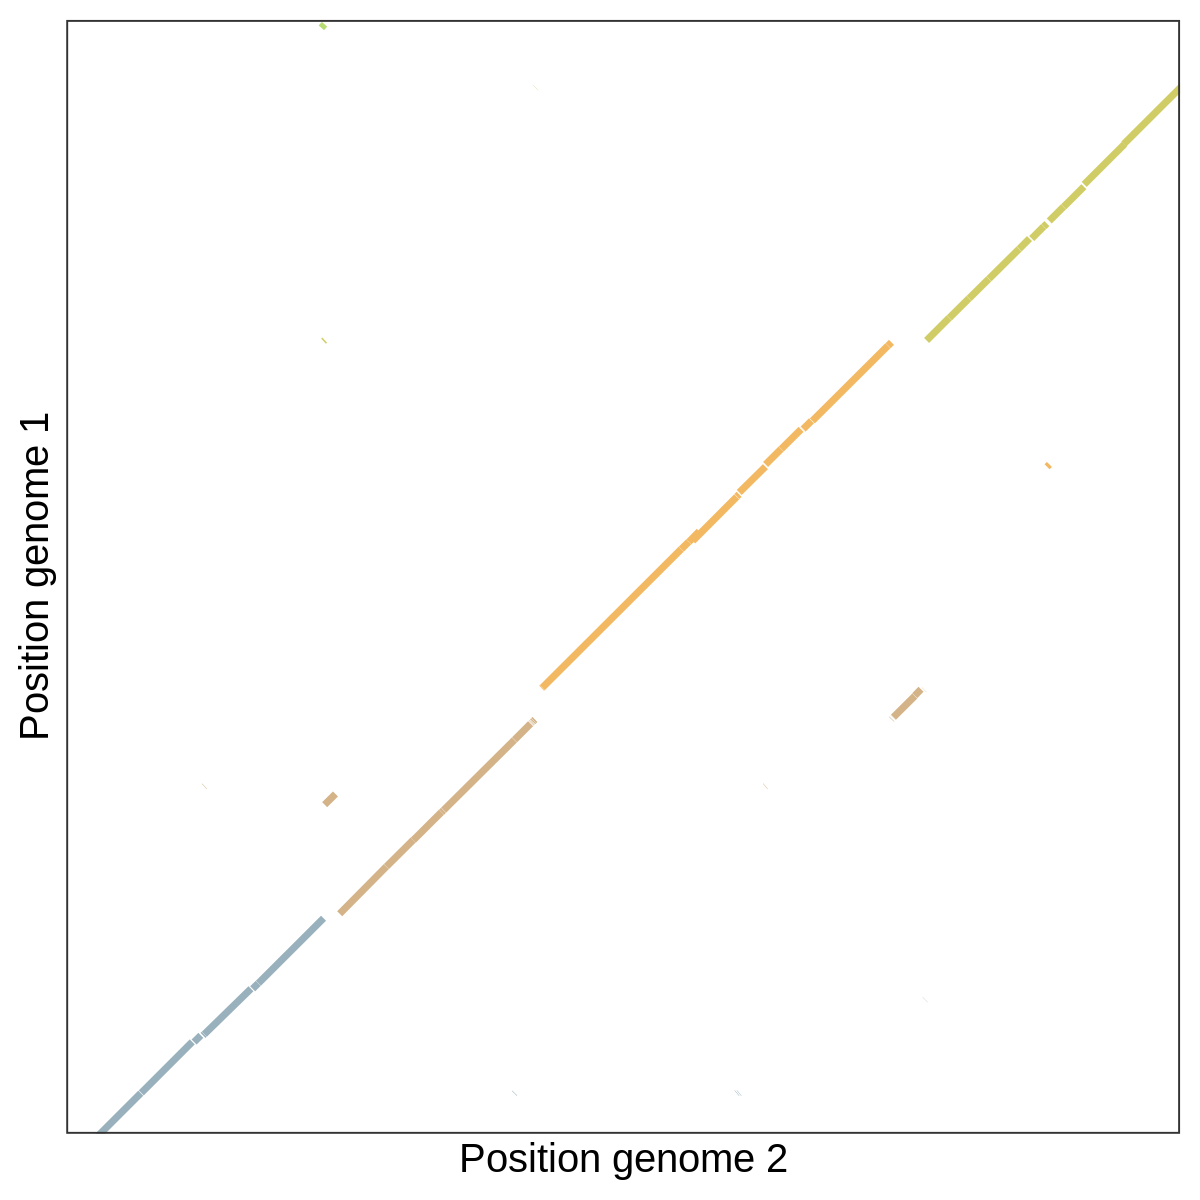

In [75]:
readRDS("~/data/trd/SV_analysis/ChrisC8.mash1.RDS")+theme_bw(24)+
scale_x_continuous(breaks=NULL)+scale_y_continuous(breaks=NULL)+
theme(legend.position="none")+xlab(NULL)+ylab(NULL)
ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/dotplot_large.svg", width=3, height=3)


readRDS("~/data/trd/SV_analysis/ChrisC8.mash1.RDS")+theme_bw(24)+
scale_x_continuous(breaks=NULL)+scale_y_continuous(breaks=NULL)+
theme(legend.position="none")+xlab("Position genome 2")+ylab("Position genome 1")+
coord_cartesian(xlim=c(6000000,9000000),
               ylim=c(6000000,9000000))
ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/dotplot_small.svg", width=6, height=6)


$pi_distorter
$pi_distorter$pi_pop
[1] 0.001429285

$pi_distorter$ecdf_value
[1] 0.4959839

$pi_distorter$standardized_measure
[1] -0.06834186


$pi_other
$pi_other$pi_pop
[1] 0.004317234

$pi_other$ecdf_value
[1] 0.590798

$pi_other$standardized_measure
[1] -0.05166381


$fst
$fst$sum_value
[1] 0.3333718

$fst$ecdf_value
[1] 0.858353

$fst$standardized_measure
[1] 1.119244


$dxy
$dxy$sum_value
[1] 0.004754607

$dxy$ecdf_value
[1] 0.7191374

$dxy$standardized_measure
[1] -0.008265242

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 1153 rows containing non-finite values (`stat_bin()`)."


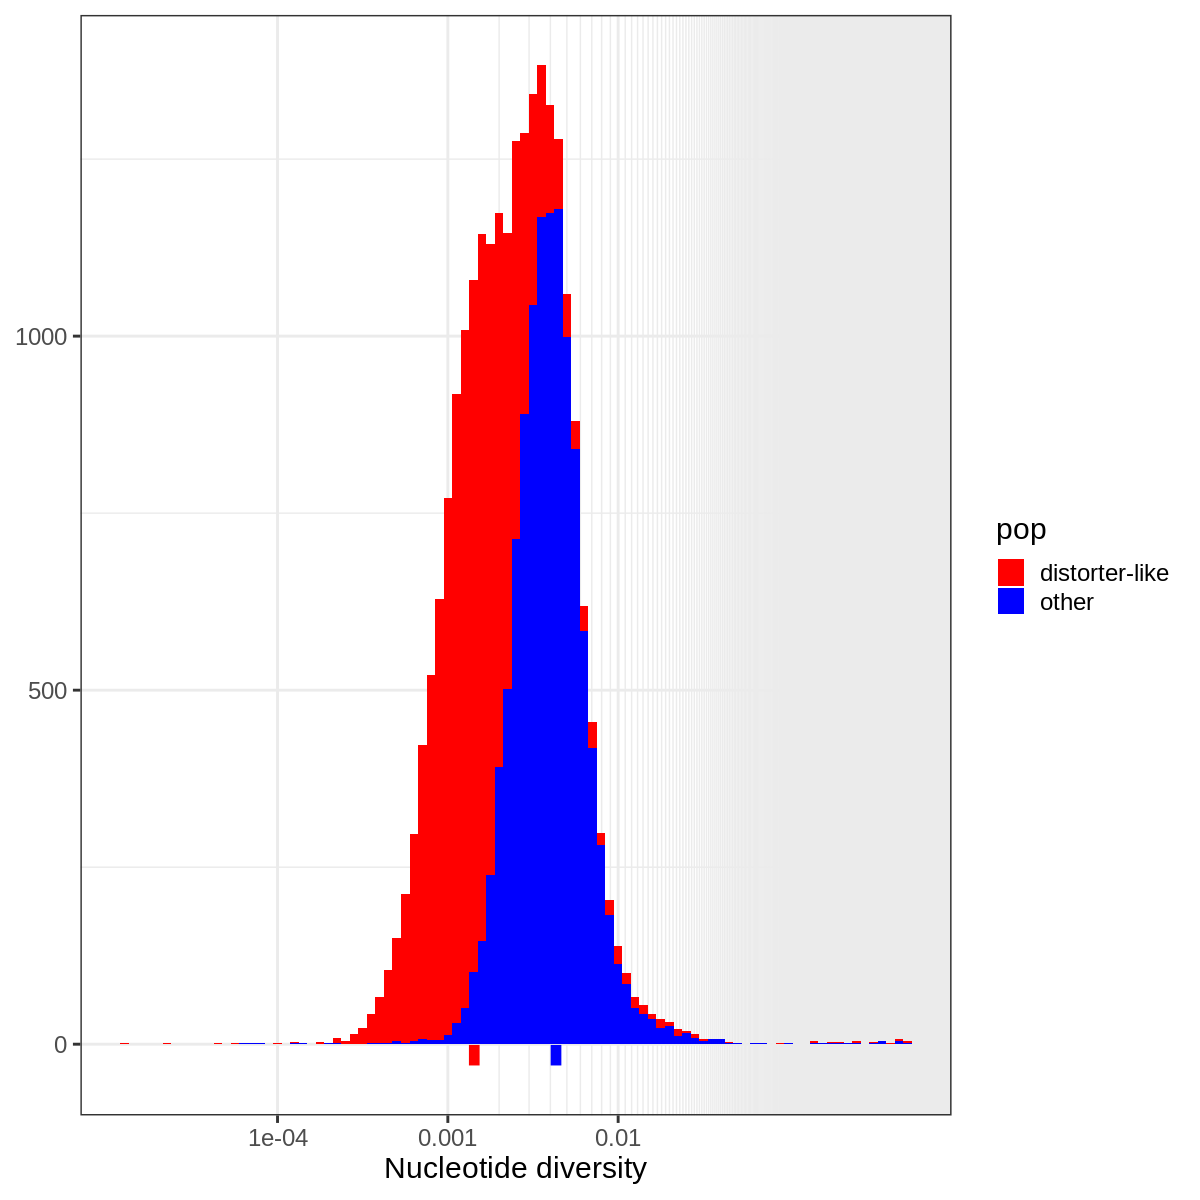

In [64]:
readRDS("/home/jnrunge/data/trd/pop_genomics/YJNRC3.2-relative-measures.RDS")
readRDS("/home/jnrunge/data/trd/pop_genomics/YJNRC3.2-pi-plot.RDS")

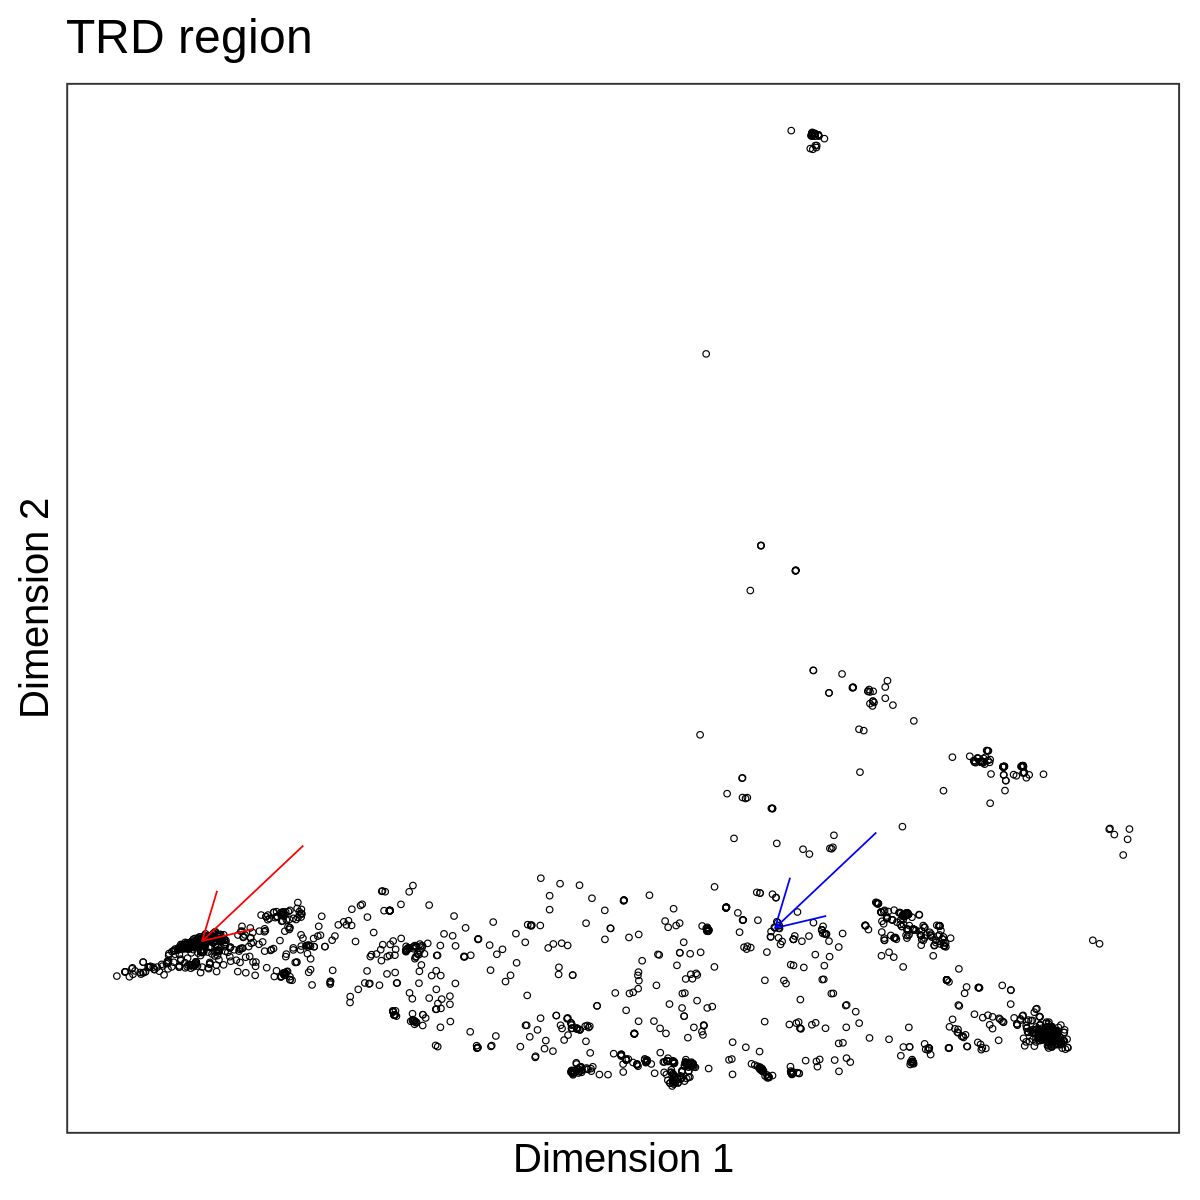

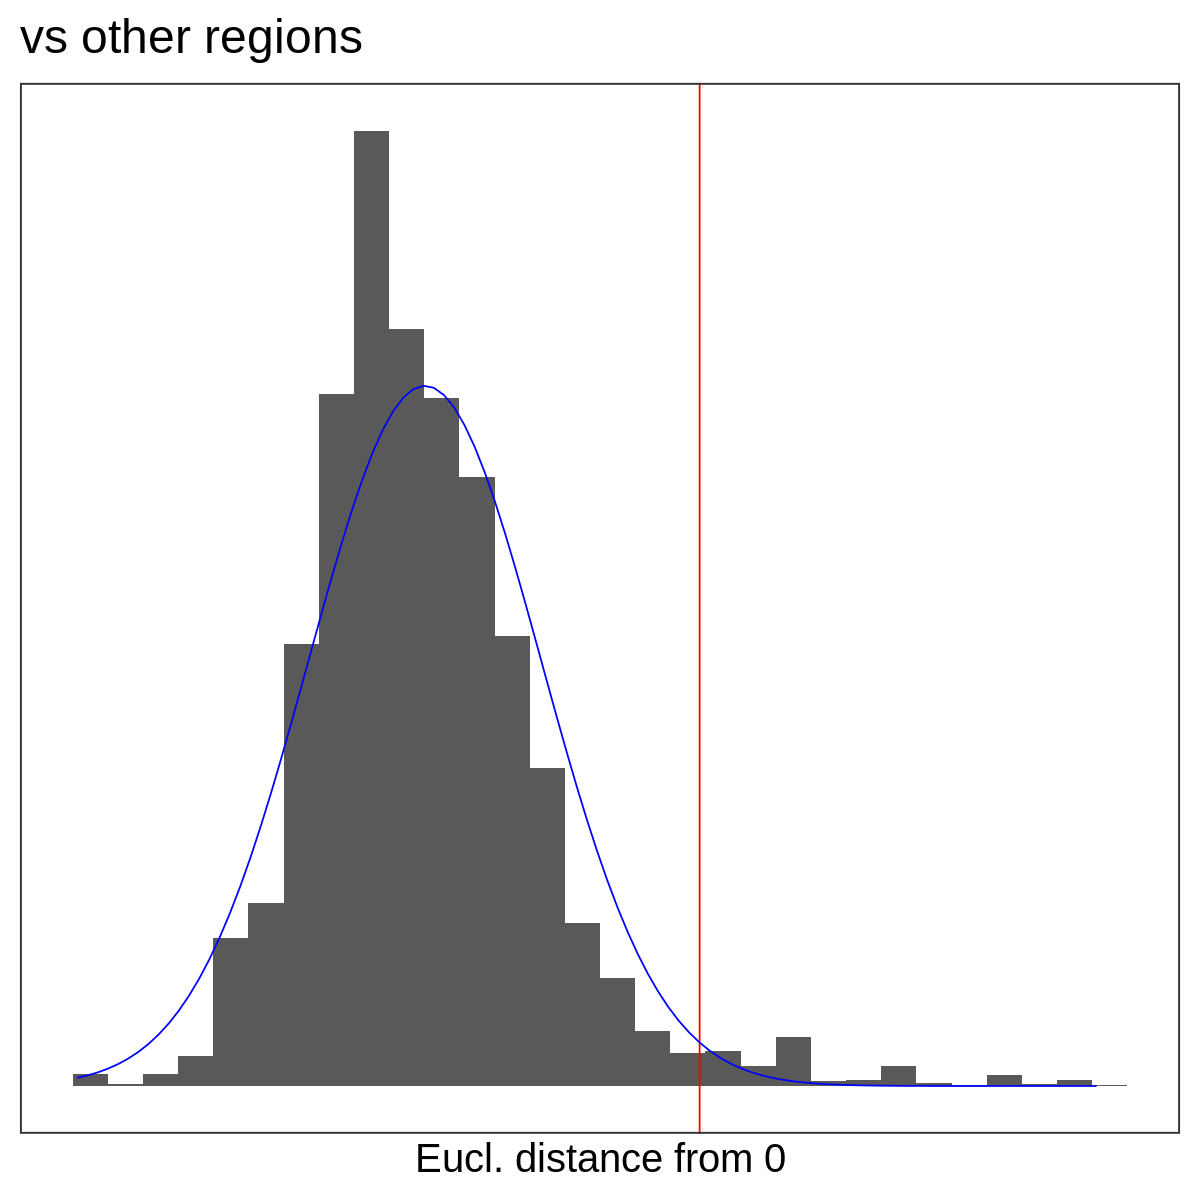

In [78]:
cross<-"YJNRC3"
id<-"4"
readRDS(paste0("~/data/trd/local_phylogenies_trd_analysis/",
                cross,".",id,".","IBS MDS",".RDS"))+theme_bw(24)+theme(legend.position="none")+
ggtitle("TRD region")+xlab("Dimension 1")+ylab("Dimension 2")+scale_y_continuous(breaks=NULL)+
scale_x_continuous(breaks=NULL)    
ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/PCA.svg", width=4, height=4)

#print(readRDS("/home/jnrunge/data/trd/local_phylogenies_trd_analysis/YJNRC3.4.AKH.IBS.RDS"))
readRDS("/home/jnrunge/data/trd/local_phylogenies_trd_analysis/YJNRC3.4.BQC.IBS.RDS")+theme_bw(24)+
ggtitle("vs other regions")+scale_y_continuous(breaks=NULL)+
scale_x_continuous(breaks=NULL)    
ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/PCA_dist.svg", width=4, height=4)


$pi_distorter
$pi_distorter$pi_pop
[1] 0.007813069

$pi_distorter$ecdf_value
[1] 0.9823642

$pi_distorter$standardized_measure
[1] 0.3542026


$pi_other
$pi_other$pi_pop
[1] 0.01073418

$pi_other$ecdf_value
[1] 0.9687445

$pi_other$standardized_measure
[1] 0.365668


$fst
$fst$sum_value
[1] 0.3624849

$fst$ecdf_value
[1] 0.9542398

$fst$standardized_measure
[1] 1.702616


$dxy
$dxy$sum_value
[1] 0.01708597

$dxy$ecdf_value
[1] 0.9885629

$dxy$standardized_measure
[1] 0.6564952

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 1152 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 1152 rows containing non-finite values (`stat_bin()`)."
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
"Transformation introduced infinite values in continuous x-axis"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 573 rows containing non-finite values (`stat_bin()`)."


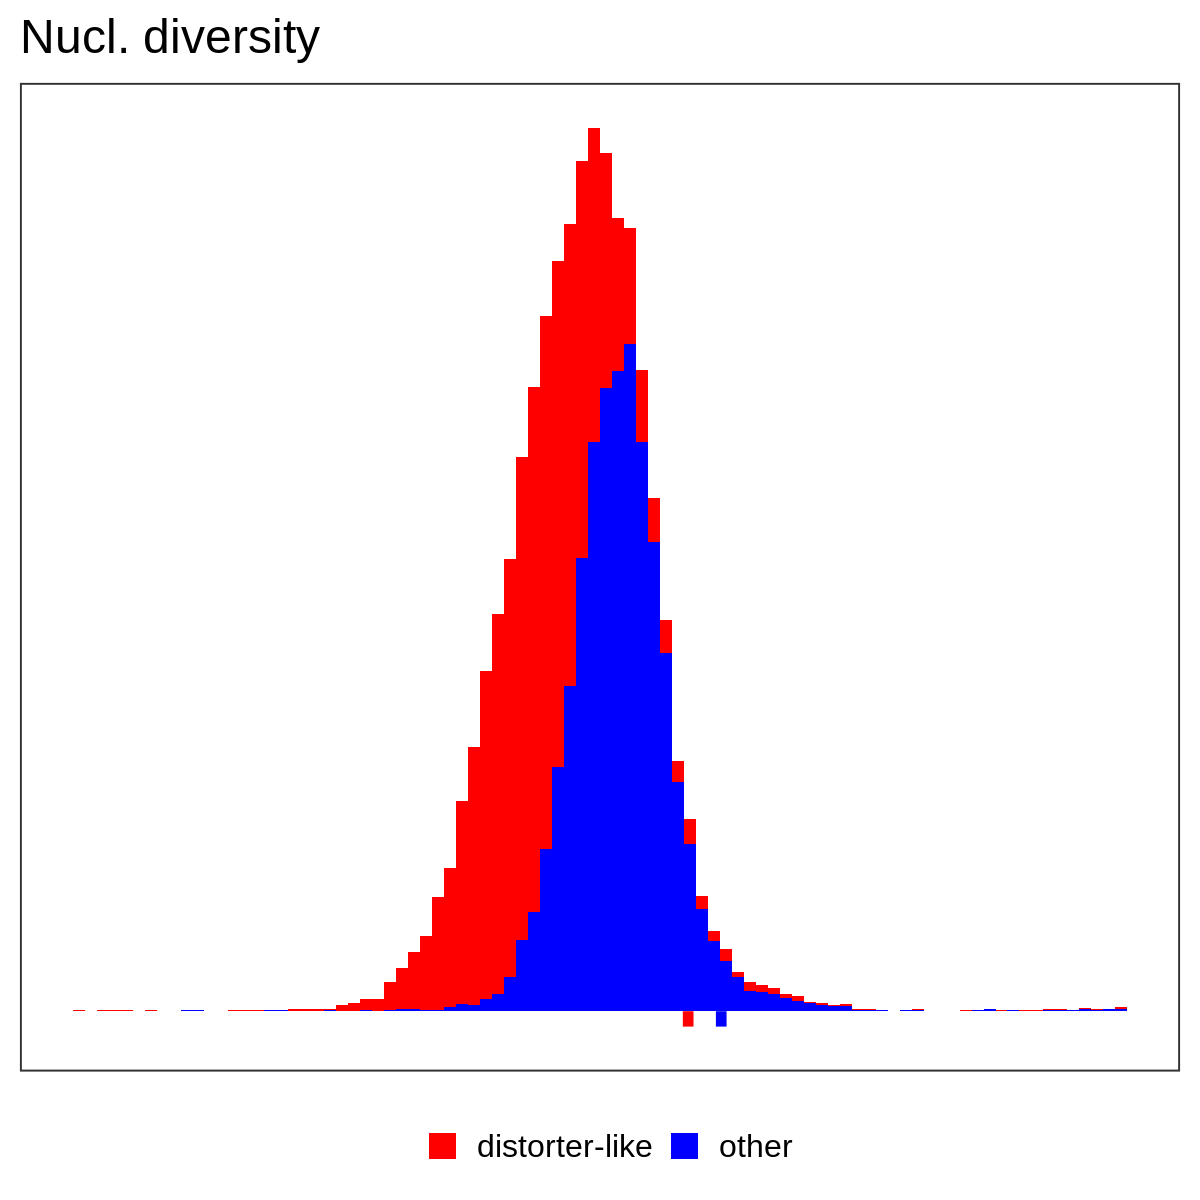

Warning message:
"Transformation introduced infinite values in continuous x-axis"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 573 rows containing non-finite values (`stat_bin()`)."


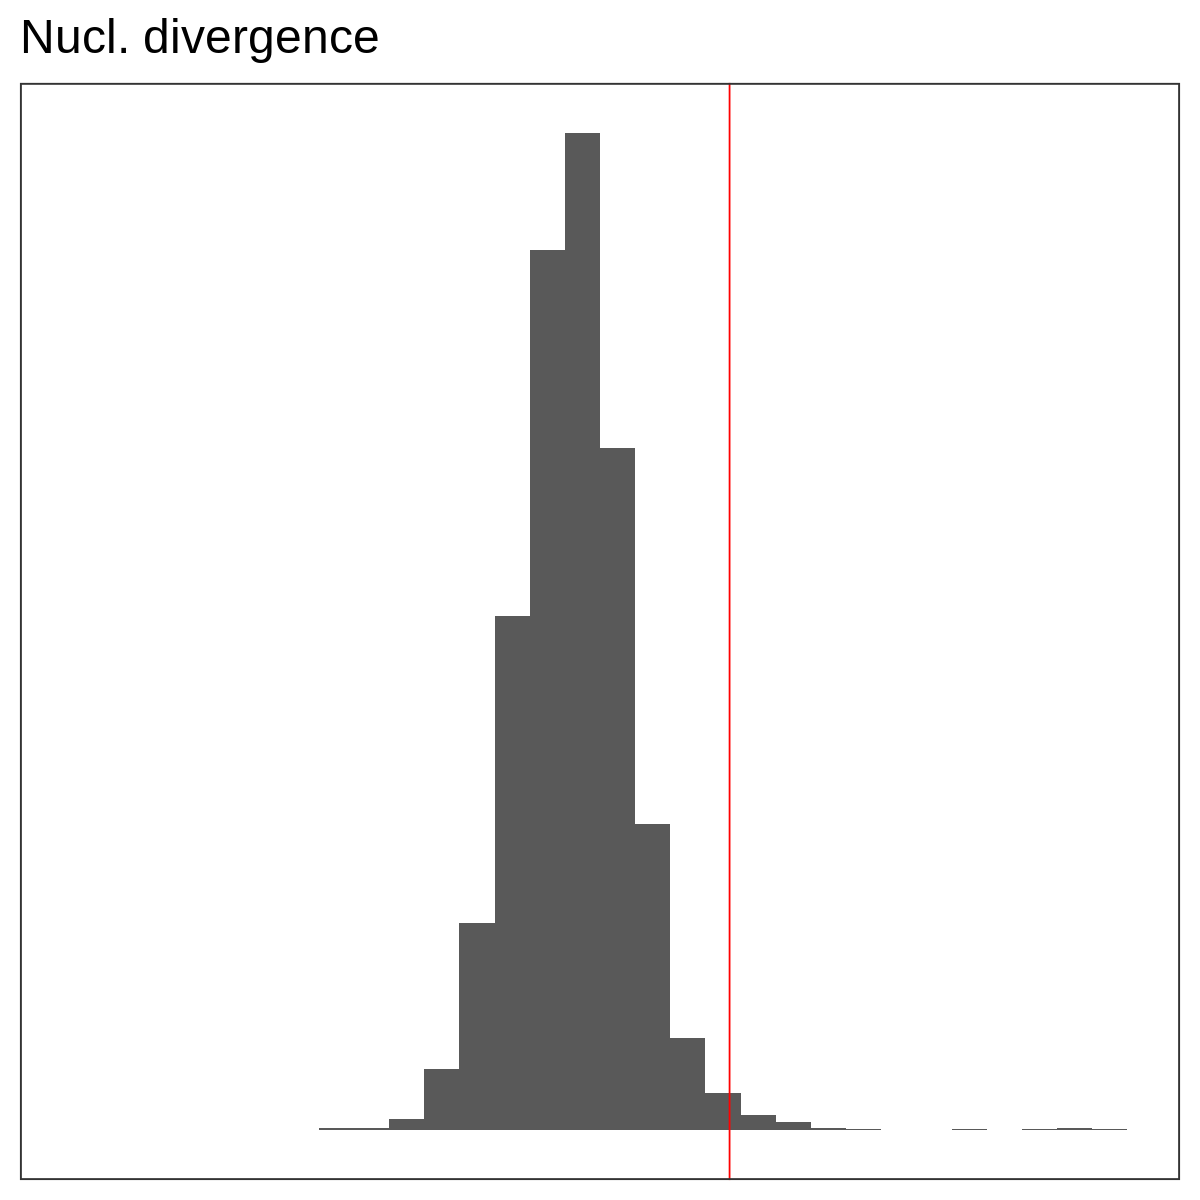

In [87]:
readRDS("/home/jnrunge/data/trd/pop_genomics/YJNRC5.1-relative-measures.RDS")
readRDS("/home/jnrunge/data/trd/pop_genomics/YJNRC5.1-pi-plot.RDS")+theme_bw(24)+theme(legend.position="bottom")+ggtitle("Nucl. diversity")+xlab(NULL)+ylab(NULL)+labs(fill=NULL,color=NULL)+scale_x_log10(breaks=NULL)+scale_y_continuous(breaks=NULL)
ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/pi.svg", width=4, height=4)

readRDS("/home/jnrunge/data/trd/pop_genomics/YJNRC5.1-Dxy-plot.RDS")+theme_bw(24)+theme(legend.position="none")+ggtitle("Nucl. divergence")+xlab(NULL)+ylab(NULL)+labs(fill="Strains",color="Strains")+scale_x_log10(breaks=NULL)+scale_y_continuous(breaks=NULL)
ggsave("~/TRD/03_GenomicSignals/PlotsForPoster/dxy.svg", width=4, height=4)
